###  This code is called "Searching The Treasure" in 3 parts:
#### 1. By manually mining the territorry getting initial insights about the dataset (TREASURE environment)
#### 2. By getting a better understanding about how  statistics tests are an important part of the data exploration/preparation (correlations, f-test and chi2 according to the datatype).. tools to improve your mining process
#### 3. By applying a more effective and productive way in preparing/exploring data using SelectKBest for Feature Selection to finally find the TREASURE

In [1]:

### default libraries
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt 

## libraries for feature selection 
from scipy import stats

##  to select the best features that explain my target variable 
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
df_survey = pd.read_csv('/Users/janet.xuishi/Documents/DA_L7/DA_L7/L7_term2/data_exploration/wk10_Airlines_Satisfaction.csv')

#### Part 1 - Mining the data.... we don't know what we don't know...

#### We are going to mining the data and see what could be our target value - Treasure

In [3]:
df_survey

,id,Gender,Customer Type,Age,AgeGroup,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,10-20,Personal Travel,Eco Plus,460,Neutral,Satisfied,...,Very Satisfied,Satisfied,Neutral,Satisfied,Satisfied,Very Satisfied,Very Satisfied,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,20-30,Business travel,Business,235,Neutral,Dissatisfied,...,Very dissatisfied,Very dissatisfied,Very Satisfied,Neutral,Very dissatisfied,Satisfied,Very dissatisfied,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,20-30,Business travel,Business,1142,Dissatisfied,Dissatisfied,...,Very Satisfied,Satisfied,Neutral,Satisfied,Satisfied,Satisfied,Very Satisfied,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,20-30,Business travel,Business,562,Dissatisfied,Very Satisfied,...,Dissatisfied,Dissatisfied,Very Satisfied,Neutral,Very dissatisfied,Satisfied,Dissatisfied,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,>30,Business travel,Business,214,Neutral,Neutral,...,Neutral,Neutral,Satisfied,Satisfied,Neutral,Neutral,Neutral,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,20-30,Business travel,Eco,192,Dissatisfied,Very dissatisfied,...,Dissatisfied,Neutral,Very dissatisfied,Satisfied,Dissatisfied,Neutral,Dissatisfied,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,>30,Business travel,Business,2347,Satisfied,Satisfied,...,Very Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,Satisfied,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,>30,Business travel,Business,1995,Very dissatisfied,Very dissatisfied,...,Satisfied,Neutral,Dissatisfied,Satisfied,Very Satisfied,Very Satisfied,Satisfied,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,20-30,Business travel,Eco,1000,Very dissatisfied,Very dissatisfied,...,Very dissatisfied,Satisfied,Very Satisfied,Very dissatisfied,Very Satisfied,Satisfied,Very dissatisfied,0,0.0,neutral or dissatisfied


In [4]:
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   AgeGroup                           103904 non-null  object 
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  object 
 9   Departure/Arrival time convenient  103904 non-null  object 
 10  Ease of Online booking             103904 non-null  object 
 11  Gate location                      1039

In [5]:
### First we want to clean the data...
### We started by replacing the Arrival Delay according to the Departure Delay (to keep the data consistent) 
### According to our discussion during the class
df_survey['Arrival Delay in Minutes'] = df_survey['Arrival Delay in Minutes'].fillna(df_survey['Departure Delay in Minutes'])

In [6]:
df_survey.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
AgeGroup                             0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [7]:
df_survey[df_survey['Arrival Delay in Minutes'].isnull()]

,id,Gender,Customer Type,Age,AgeGroup,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction


In [8]:
df_survey.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
AgeGroup                             0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [9]:
### We decided that satisfaction would be a target variable to evaluate - Our treasure!!
df_survey['satisfaction'].describe()

count                      103904
unique                          2
top       neutral or dissatisfied
freq                        58879
Name: satisfaction, dtype: object

In [10]:
### we started analysing one column (category) just to see if there is any  relationships between these two categories
ct1 = pd.crosstab(df_survey['Customer Type'], df_survey['satisfaction'])

In [11]:
ct1 

satisfaction,neutral or dissatisfied,satisfied
Customer Type,,
Loyal Customer,44390,40533
disloyal Customer,14489,4492


/Users/janet.xuishi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/janet.xuishi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/janet.xuishi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/janet.xuishi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

<Axes: xlabel='Customer Type', ylabel='count'>

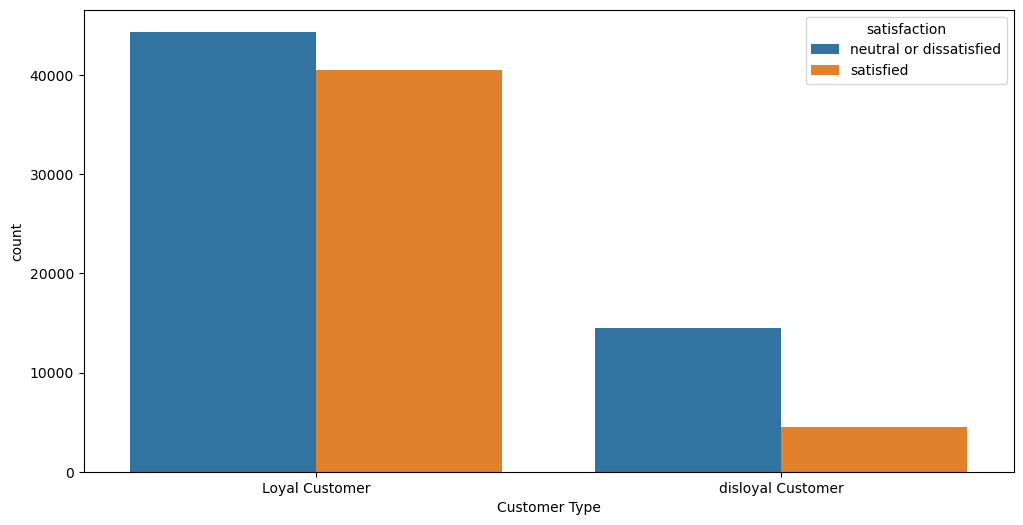

In [12]:
## we ploted the table using barplot to help us see any relationship... 
plt.figure(figsize=(12,6))
sns.countplot(hue='satisfaction',x='Customer Type', data = df_survey)

In [13]:
## we are now changing our variable to Class vs. Satifaction to see if there are any relationship between these two categories

ct2 = pd.crosstab(df_survey['Class'], df_survey['satisfaction'])

In [14]:
ct2 

satisfaction,neutral or dissatisfied,satisfied
Class,,
Business,15185,34480
Eco,38044,8701
Eco Plus,5650,1844


/Users/janet.xuishi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/janet.xuishi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/janet.xuishi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/janet.xuishi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

<Axes: xlabel='Class', ylabel='count'>

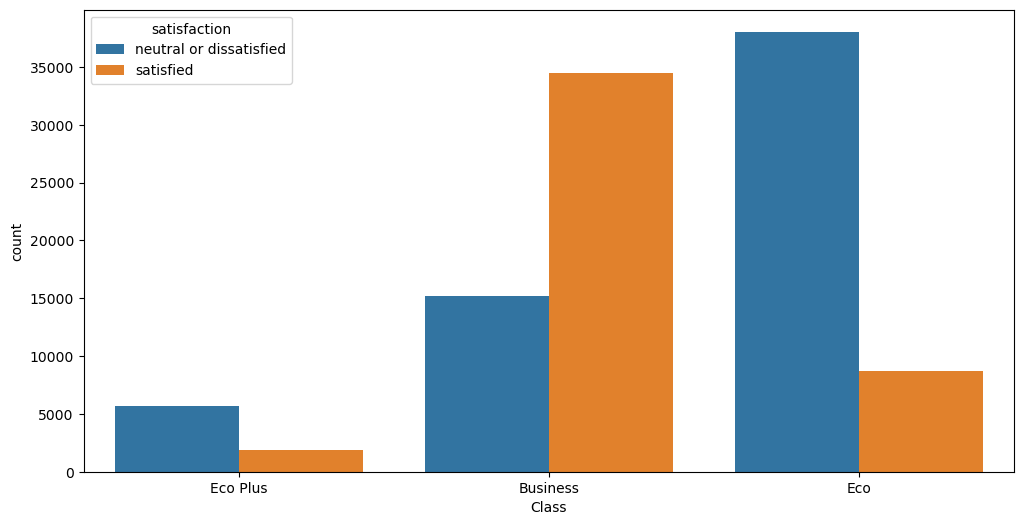

In [15]:
## by ploting these two categorical variable we see that Class has an inpact on satisfaction... such a surprise!!! :)
plt.figure(figsize=(12,6))
sns.countplot(hue='satisfaction',x='Class', data = df_survey)

<Axes: xlabel='satisfaction', ylabel='Class'>

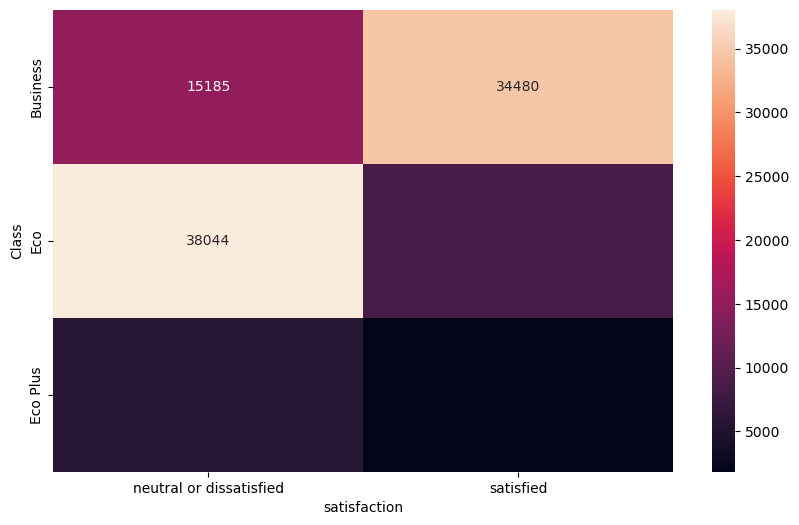

In [16]:

### heatmap  are used for categories as well to show this impact on the target variable... .
plt.figure(figsize=(10, 6))
sns.heatmap(ct2, annot=True, fmt='d')

### Part 2 - Recaping statistics concepts that could be helpful for us in identifying relationships between columns/features

In [17]:
### Chi2, like correlation is one metric to measure the relationship between categories
stats.chi2_contingency(pd.crosstab(df_survey['Class'], df_survey['satisfaction']))
## here we see that there are significant difference between the groups (Class) that could explain our target = customer satisfation 

Chi2ContingencyResult(statistic=26471.86294449228, pvalue=0.0, dof=2, expected_freq=array([[28143.53186595, 21521.46813405],
       [26488.86332576, 20256.13667424],
       [ 4246.60480828,  3247.39519172]]))

In [18]:

## we decided then to be more productive using  proper tools for data mining 
## by selecting all categories from our dataframe... we have the entire list of categories
catcol = df_survey.select_dtypes(include=['object']).columns


In [19]:
### apply chi2 for every single category 
results_list = []
for var1 in catcol:
      contingency_table = pd.crosstab(df_survey['satisfaction'],df_survey[var1])
      chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
      results_list.append({
        'Variable': var1,
        'Chi2': chi2,
        'P-value': p,
        'Degrees of Freedom': dof
       
    })

results_df = pd.DataFrame(results_list)
results_df

,Variable,Chi2,P-value,Degrees of Freedom
0,Gender,15.444417,8.496755e-05,1
1,Customer Type,3657.280805,0.000000e+00,1
2,AgeGroup,3563.366125,0.000000e+00,3
3,Type of Travel,20945.233826,0.000000e+00,1
4,Class,26471.862944,0.000000e+00,2
5,Inflight wifi service,28696.409227,0.000000e+00,5
6,Departure/Arrival time convenient,451.062637,2.897692e-95,5
7,Ease of Online booking,10407.606042,0.000000e+00,5
8,Gate location,2493.443647,0.000000e+00,5
9,Food and drink,5203.235820,0.000000e+00,5


In [20]:
### Chi2 is a traditional method for statistics for testing independency.. however it didn't help us too much
## it says that the group has differences.. but we cannot see the impact on the satisfaction target value... let's use a more powerful arseanal...


### Part 3 - Using SelectKBest (as we applied before, previous class) but now for categories.. and let's see how it goes.. 

In [21]:
### lets copy the dataframe and call as category just to make sure that we are dealing with categories and they ALL will be encoded.. 
df_survey_cat = df_survey.copy()

In [22]:
catcol

Index(['Gender', 'Customer Type', 'AgeGroup', 'Type of Travel', 'Class',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction'],
      dtype='object')

In [23]:
### enconding dt_survey_cat for all columns - datatype = category 
for col in catcol:
    df_survey_cat[col] = df_survey_cat[col].astype('category').cat.codes

In [24]:
## here you can see the dataset was converted)
df_survey_cat

,id,Gender,Customer Type,Age,AgeGroup,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,1,0,13,1,1,2,460,1,3,...,4,3,1,2,3,4,4,25,18.0,0
1,5047,1,1,25,2,0,0,235,1,0,...,5,5,4,1,5,3,5,1,6.0,0
2,110028,0,0,26,2,0,0,1142,0,0,...,4,3,1,2,3,3,4,0,0.0,1
3,24026,0,0,25,2,0,0,562,0,4,...,0,0,4,1,5,3,0,11,9.0,0
4,119299,1,0,61,3,0,0,214,1,1,...,1,1,3,2,1,1,1,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,0,1,23,2,0,1,192,0,5,...,0,1,5,2,0,1,0,3,0.0,0
103900,73097,1,0,49,3,0,0,2347,3,3,...,4,4,4,3,4,4,3,0,0.0,1
103901,68825,1,1,30,3,0,0,1995,5,5,...,3,1,0,2,4,4,3,7,14.0,0
103902,54173,0,1,22,2,0,1,1000,5,5,...,5,3,4,4,4,3,5,0,0.0,0


/Users/janet.xuishi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/janet.xuishi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/janet.xuishi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/janet.xuishi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

/Users/janet.xuishi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/janet.xuishi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/janet.xuishi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/janet.xuishi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

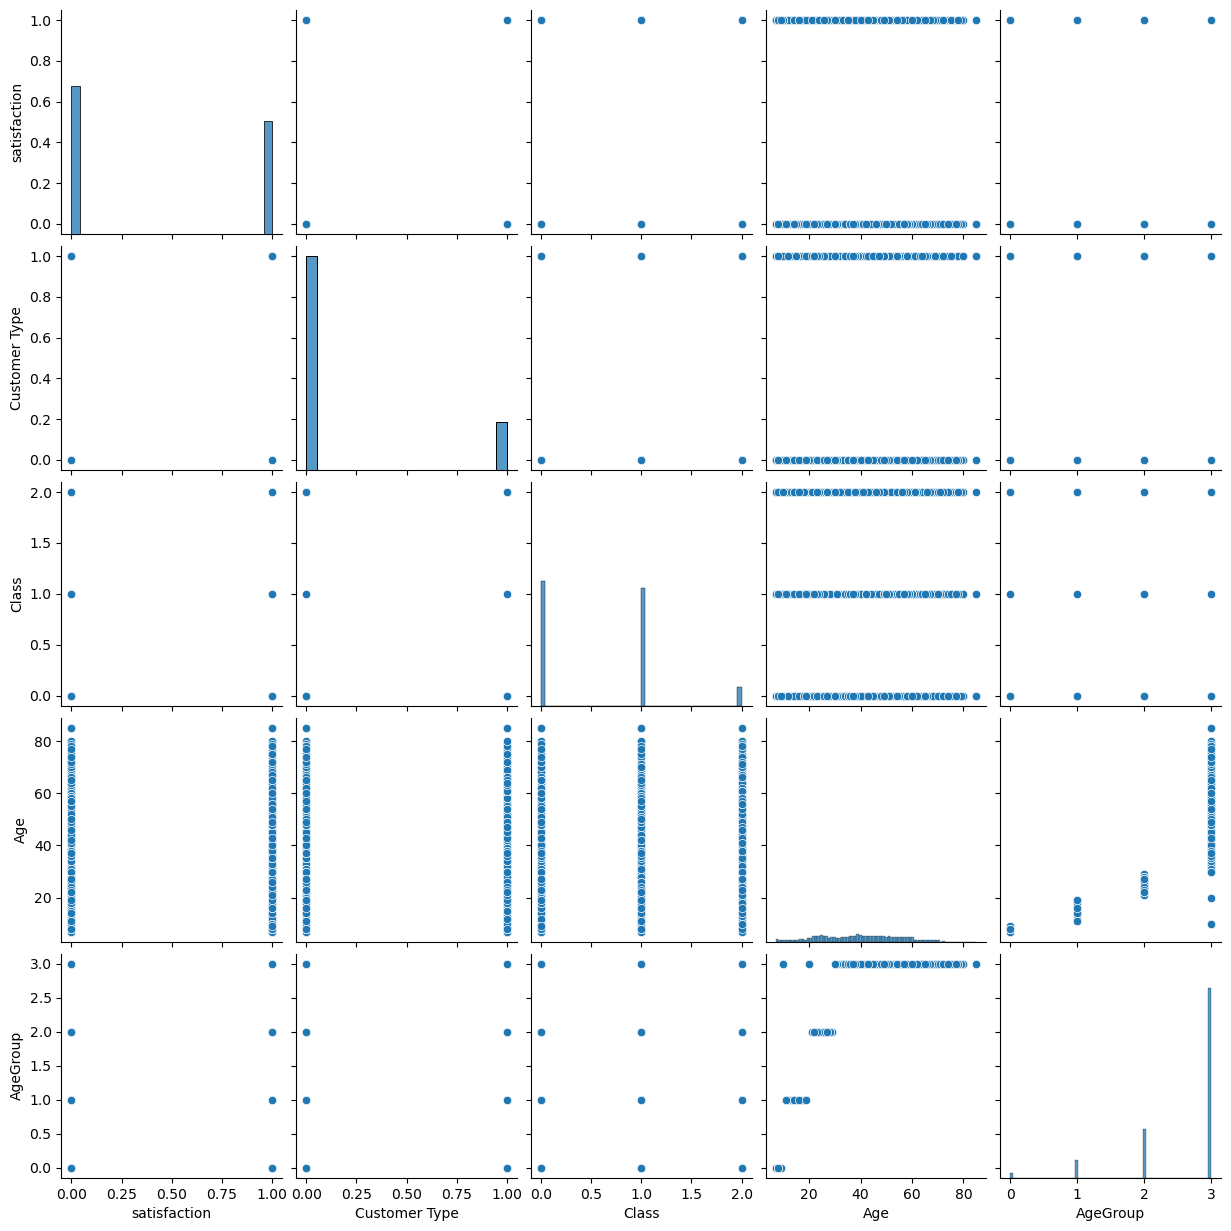

In [25]:
### now that we have the dataframe converted into numeric (encoded) let's see if some visualisations (like pairplot) would help us.. 
sns.pairplot(df_survey_cat[['satisfaction','Customer Type','Class','Age','AgeGroup']])

In [26]:
### I know.. terrible idea :D
### well, despite the fact that the dataframe is numerical .. we can't really find a meaninful relationship between categories.. no treasure so far!!! 
#### don't give up.. we are nearly there!!

In [27]:
#call the library SelectKBest, and passing 'all' since we want to submit all my categories to this selection 
ModelSelect = SelectKBest(score_func=f_classif,k='all')

### We are passing now all the dataset, not only the encoded categories !!!! 13/03/2023


In [28]:
### fit the model and calculate the score for all categories that can explain satisfaction 
fit=ModelSelect.fit(df_survey_cat,df_survey_cat['satisfaction'])

/Users/janet.xuishi/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [29]:
### save the columns into a variable - here is filter 
filter = ModelSelect.get_support(indices=True)

In [30]:
filter 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [31]:
### restore the name of the columns according to the filter position of the column... 
features_selected = df_survey_cat.iloc[:,filter]

In [32]:
### get all the scores for each columns that contributed to the customer satisfaction 
feature_scores = fit.scores_

In [33]:
### the map of the treasure is too messy.. let's see how we can improve that... 
feature_scores

array([1.96030595e+01, 1.54956813e+01, 3.79168836e+03, 1.99238912e+03,
       3.66705098e+03, 2.62360044e+04, 2.62830057e+04, 1.01844219e+04,
       7.47871922e+03, 2.72346206e+00, 3.35550785e+03, 6.85427821e+02,
       1.91071372e+01, 1.75638922e+04, 5.23074789e+03, 3.66666046e+03,
       2.32776144e+03, 3.42702187e+03, 3.53655542e+03, 3.35779496e+02,
       4.27562602e+03, 9.77539928e+02, 2.65592493e+02, 3.44931963e+02,
                  inf])

/Users/janet.xuishi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/janet.xuishi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/janet.xuishi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 0, 'Score')

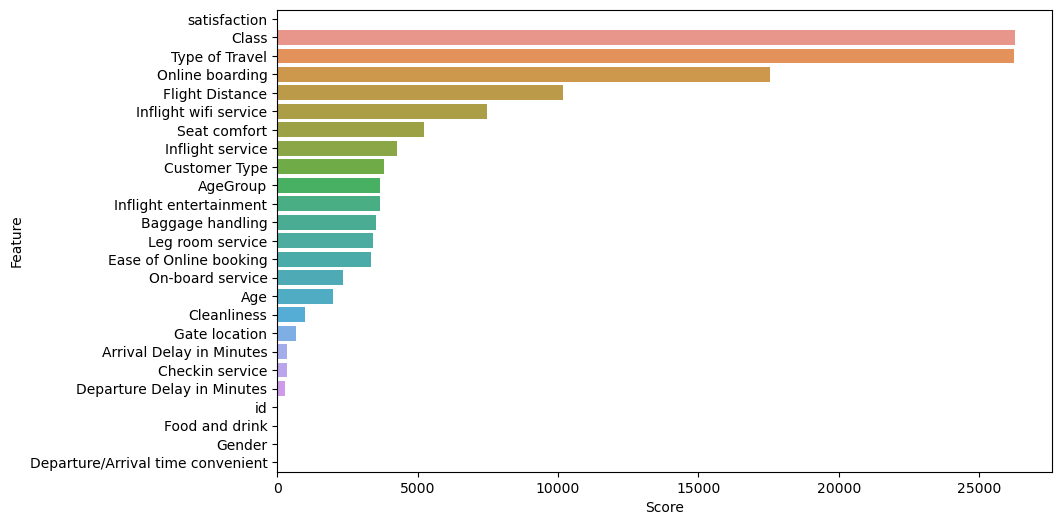

In [34]:
### by creating a data frame with feature selected and feature_scores.. and plot into a barplot graph... 
df_scores = pd.DataFrame({'Feature': features_selected.columns, 'Score': feature_scores})
df_scores =df_scores.sort_values(by = 'Score', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Feature', data=df_scores)
plt.xlabel('Score')

In [35]:
# Importing libraries 
import statsmodels.api as sm 
from statsmodels.formula.api import ols 
import numpy as np

In [36]:
### example from https://datatab.net/tutorial/two-factorial-anova-without-repeated-measures

# Create a dataframe 
df_ftest = pd.DataFrame({'Gender': ['male','male','male','male','male','male','male','male','male','male','female','female','female','female','female','female','female','female','female','female'], 
                    'Studied': ['no','no','no','no','no','yes','yes','yes','yes','yes','no','no','no','no','no','yes','yes','yes','yes','yes'],
                     'Retirement': [6,4,7,9,3,4,5,6,7,5,8,3,5,8,6,3,5,9,2,3]}) 


In [37]:

# Performing two-way ANOVA 
model = ols( 
    'Retirement ~ C(Studied) + C(Gender) + C(Studied):C(Gender)', data=df_ftest).fit() 
sm.stats.anova_lm(model, typ=2) 

,sum_sq,df,F,PR(>F)
C(Studied),5.0,1.0,1.036269,0.323838
C(Gender),0.8,1.0,0.165803,0.689265
C(Studied):C(Gender),1.8,1.0,0.373057,0.549922
Residual,77.2,16.0,NaN,NaN


In [38]:

# Performing two-way ANOVA using our arlines 
model = ols( 
    'satisfaction ~ C(AgeGroup) + C(Class) + C(AgeGroup):C(Class)', data=df_survey_cat).fit() 
sm.stats.anova_lm(model, typ=2) 

,sum_sq,df,F,PR(>F)
C(AgeGroup),182.043659,3.0,336.294382,2.414784e-217
C(Class),5807.350363,2.0,16092.122999,0.000000e+00
C(AgeGroup):C(Class),85.487920,6.0,78.962122,6.356419e-99
Residual,18746.353229,103892.0,NaN,NaN
